In [1]:
library(DESeq2)
library(RColorBrewer)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: 'S4Vectors'


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges


Attaching package: 'IRanges'


The following object is masked from 'package:grDevices':

    windows


Loading required package: GenomicRanges

Loading req

In [2]:
library(reshape2)


In [3]:
library("gplots")



Attaching package: 'gplots'


The following object is masked from 'package:IRanges':

    space


The following object is masked from 'package:S4Vectors':

    space


The following object is masked from 'package:stats':

    lowess




In [4]:
library(readxl)
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ lubridate::%within%() masks IRanges::%within%()
✖ dplyr::collapse()     masks IRanges::collapse()
✖ dplyr::combine()      masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()        masks matrixStats::count()
✖ dplyr::desc()         masks IRanges::desc()
✖ tidyr::expand()       masks S4Vectors::expand()
✖ dplyr::filter()       masks stats::filter()
✖ dplyr::first()        masks S4Vectors::first()
✖ dplyr::lag()          masks stats::lag()
✖ ggplot2::Position()   masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()       masks GenomicRanges

In [5]:
library("pheatmap")
library("RColorBrewer")

In [6]:
options(repr.plot.width = 10, repr.plot.height = 10, repr.plot.res = 300)

In [7]:
HCOLOR = '#E26A2C'
HCOLOR_light = '#FDA65D'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'
PRO_COLOR = 'MediumSeaGreen'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

tpal = brewer.pal(5, "Purples")
gpal = brewer.pal(4, 'Dark2')
ann_colors = list(
    Timepoint = c('1'=tpal[1], '2'=tpal[2], '3'=tpal[3], 
                  '4'=tpal[4], '5'=tpal[5]),
    Group = c(A =HCOLOR_light, C = HCOLOR)
)


In [8]:
list.files()

[1] "CC1A3 RNASEQ 1A3 DESeq ref vs longterm.ipynb" 
 [2] "CC1A3 RNASEQ 1A3 DESeq.ipynb"                 
 [3] "CC1A3 RNASEQ 1A3 DESeq_longterm2.ipynb"       
 [4] "CC1A3 RNASEQ MED4 correlation.ipynb"          
 [5] "CC1A3 RNASEQ MED4 DESeq ref vs longterm.ipynb"
 [6] "CC1A3 RNASEQ MED4 DESeq.ipynb"                
 [7] "CC1A3 RNASEQ MED4 DESeq_longterm2.ipynb"      
 [8] "CC1A3 WGCNA CC.ipynb"                         
 [9] "data"                                         
[10] "DE_results"                                   
[11] "figures"

In [9]:
fname_counts = file.path('data', 'HOT1A3_counts_combined.txt')

In [10]:
cdf = read.csv(fname_counts, sep='\t' )

In [11]:
rownames(cdf) = cdf$gene_id

In [12]:
md = read_excel(file.path('data','CC1A3_RNASEQ_metadata.xlsx'))

In [13]:
names(md)

[1] "sample_id"               "TGCnew#"                
 [3] "sample"                  "Conc.Qubit TGC [ng/ul]" 
 [5] "starting input RNA (ng)" "Lib_conc [ng/ul]"       
 [7] "Group"                   "Timepoint"              
 [9] "Replicate"               "Day"                    
[11] "extraction"              "techincal_replicate"

In [14]:
md = md %>% rename('init_RNA' = 'starting input RNA (ng)')

In [15]:
md = md %>% mutate(phase = factor(recode(Timepoint, 
                                  '1' = 'logExp', 
                                  '2' = 'decline' , 
                                  '3' = 'longterm' ,
                                  '4' = 'longterm' ,
                                  '5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('logExp', 'decline', 'longterm', 'NA')))

In [16]:
group <- paste0(md$Group, md$Timepoint)
group
md$groupandtime = group

[1] "A1"       "A1"       "A1"       "A2"       "A2"       "A2"      
 [7] "A3"       "A3"       "A3"       "C1"       "C1"       "C1"      
[13] "C2"       "C2"       "C2"       "C2"       "C2"       "C3"      
[19] "C3"       "C3"       "C3"       "C3"       "C4"       "C4"      
[25] "C4"       "C5"       "C5"       "C5"       "MockMock" "P1"      
[31] "P1"       "P1"       "P2"       "P2"       "P2"

In [17]:
md = md %>% mutate(treatment = factor(recode(groupandtime, 
                                  'A1' = 'A1', 
                                  'A2' = 'A2', 
                                  'A3' = 'A3', 
                                  'C1' = 'C1' , 
                                  'C2' = 'C2' , 
                                  'C3' = 'C3' ,
                                  'C4' = 'longterm' ,
                                  'C5' = 'longterm' ,
                                         .default = 'NA'
                                 ), levels=c('A1', 'A2', 'A3', 'C1', 'C2', 'C3', 'longterm', 'NA')))

In [18]:
table(md$treatment)


      A1       A2       A3       C1       C2       C3 longterm       NA 
       3        3        3        3        5        5        6        7 

In [19]:
head(md)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


In [20]:
md$Group = factor(md$Group, levels = c('P', 'C', 'A', 'Mock'))


In [21]:
head(cdf)

,gene_id,gene,product,protein_id,old_locus_tag,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<chr>,<chr>,<chr>,<chr>,<lgl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,WP_232375975.1,NA,5962,6211,1340,2294,7210,⋯,4223,5758,4907,3285,0,0,0,0,0,0
ACZ81_RS00010,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,WP_012516526.1,NA,3590,2898,784,769,2761,⋯,1840,2191,1626,536,0,0,0,0,0,0
ACZ81_RS00015,ACZ81_RS00015,recF,DNA replication/repair protein RecF,WP_061438857.1,NA,806,756,203,284,613,⋯,504,600,368,155,0,0,0,0,0,0
ACZ81_RS00020,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_014977848.1,NA,5336,3735,960,1092,3754,⋯,2491,3503,3177,1119,0,0,0,0,0,0
ACZ81_RS00025,ACZ81_RS00025,,hypothetical protein,WP_039234509.1,NA,171,106,63,73,185,⋯,119,170,96,58,0,0,0,0,0,0
ACZ81_RS00030,ACZ81_RS00030,glyS,glycine--tRNA ligase subunit beta,WP_061438859.1,NA,3158,3375,515,737,2724,⋯,3406,3858,3955,2218,0,0,0,0,0,0


In [22]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [23]:
head(md)
head(counts)
head(genes)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C5A_S32,C5B_S33,C5C_S34,Mock_S35,P6A_S1,P6B_S2,P6C_S3,P7A_S4,P7B_S5,P7C_S6
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,5962,6211,1340,2294,7210,15750,5310,12332,20033,2434,⋯,4223,5758,4907,3285,0,0,0,0,0,0
ACZ81_RS00010,3590,2898,784,769,2761,6439,1996,4657,7835,1063,⋯,1840,2191,1626,536,0,0,0,0,0,0
ACZ81_RS00015,806,756,203,284,613,1487,601,1265,1280,368,⋯,504,600,368,155,0,0,0,0,0,0
ACZ81_RS00020,5336,3735,960,1092,3754,9944,2587,5235,7447,2153,⋯,2491,3503,3177,1119,0,0,0,0,0,0
ACZ81_RS00025,171,106,63,73,185,425,234,398,748,73,⋯,119,170,96,58,0,0,0,0,0,0
ACZ81_RS00030,3158,3375,515,737,2724,7003,1917,5476,9922,1416,⋯,3406,3858,3955,2218,0,0,0,0,0,0


,gene_id,gene,product,protein_id,old_locus_tag
,<chr>,<chr>,<chr>,<chr>,<lgl>
ACZ81_RS00005,ACZ81_RS00005,dnaA,chromosomal replication initiator protein DnaA,WP_232375975.1,NA
ACZ81_RS00010,ACZ81_RS00010,dnaN,DNA polymerase III subunit beta,WP_012516526.1,NA
ACZ81_RS00015,ACZ81_RS00015,recF,DNA replication/repair protein RecF,WP_061438857.1,NA
ACZ81_RS00020,ACZ81_RS00020,gyrB,DNA topoisomerase (ATP-hydrolyzing) subunit B,WP_014977848.1,NA
ACZ81_RS00025,ACZ81_RS00025,,hypothetical protein,WP_039234509.1,NA
ACZ81_RS00030,ACZ81_RS00030,glyS,glycine--tRNA ligase subunit beta,WP_061438859.1,NA


In [24]:
table(md$sample_id == names(counts))


TRUE 
  35 

# Remove the 60ng technical replicate and non P ,C samples

In [25]:
counts = cdf[,-c(1,2,3,4,5)]
genes = cdf[,c(1,2,3,4,5)]

In [26]:
# remove last 5 lines that are not genes
counts = head(counts, -5)
genes = head(genes, -5)

In [27]:
md_noalt = filter(md, Group %in% c('A', 'C'), techincal_replicate %in% 0)


In [28]:
counts_no_alt = select(counts, md_noalt$sample_id)

In [29]:
table(md_noalt$sample_id == names(counts_no_alt))


TRUE 
  24 

In [30]:
cts = counts_no_alt
coldata= md_noalt


In [31]:
head(coldata)

sample_id,TGCnew#,sample,Conc.Qubit TGC [ng/ul],init_RNA,Lib_conc [ng/ul],Group,Timepoint,Replicate,Day,extraction,techincal_replicate,phase,groupandtime,treatment
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<fct>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<fct>,<chr>,<fct>
A1A_S7,7,A1A,168.0,100,0.888,A,1,A,11,1,0,logExp,A1,A1
A1B_S8,8,A1B,99.8,100,0.850,A,1,B,11,1,0,logExp,A1,A1
A1C_S9,9,A1C,57.3,100,1.570,A,1,C,11,1,0,logExp,A1,A1
A2A_S10,10,A2A,69.0,100,0.592,A,2,A,18,2,0,decline,A2,A2
A2B_S11,11,A2B,41.9,100,0.570,A,2,B,18,2,0,decline,A2,A2
A2C_S12,12,A2C,67.2,100,0.980,A,2,C,18,4,0,decline,A2,A2


In [32]:
head(cts)

,A1A_S7,A1B_S8,A1C_S9,A2A_S10,A2B_S11,A2C_S12,A3A_S13,A3B_S14,A3C_S15,C1A_S16,⋯,C2C_100ng_S22,C3A_100ng_S24,C3B_60ng_S26,C3C_100ng_S27,C4A_S29,C4B_S30,C4C_S31,C5A_S32,C5B_S33,C5C_S34
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ACZ81_RS00005,5962,6211,1340,2294,7210,15750,5310,12332,20033,2434,⋯,1307,7055,3550,3148,3421,2905,1658,4223,5758,4907
ACZ81_RS00010,3590,2898,784,769,2761,6439,1996,4657,7835,1063,⋯,1207,2942,2129,1897,1526,1328,516,1840,2191,1626
ACZ81_RS00015,806,756,203,284,613,1487,601,1265,1280,368,⋯,373,943,1028,482,412,323,387,504,600,368
ACZ81_RS00020,5336,3735,960,1092,3754,9944,2587,5235,7447,2153,⋯,1655,5736,2365,3099,2082,1881,601,2491,3503,3177
ACZ81_RS00025,171,106,63,73,185,425,234,398,748,73,⋯,110,202,244,201,107,131,98,119,170,96
ACZ81_RS00030,3158,3375,515,737,2724,7003,1917,5476,9922,1416,⋯,1281,6619,1928,3241,2500,2485,593,3406,3858,3955


In [33]:
coldata$groupandtime = factor(coldata$groupandtime, levels=c("C1", "A2","A1", 'A3',"C2", "C3", "C4", "C5"))
coldata$treatment = factor(coldata$treatment, levels=c('A1', 'A2', 'A3','C1', 'C2', 'C3', 'longterm'))


coldata$Group = factor(coldata$Group, levels=c("A", "C"))
coldata$Timepoint = factor(coldata$Timepoint, levels=c(1,2,3,4,5))
coldata$extraction = factor(coldata$extraction)


In [34]:
colnames(cts) = coldata$sample
rownames(coldata) = coldata$sample


Warning message:
"Setting row names on a tibble is deprecated."


In [35]:
dput(unique(coldata$groupandtime))
dput(unique(coldata$Group))

structure(c(3L, 2L, 4L, 1L, 5L, 6L, 7L, 8L), levels = c("C1", 
"A2", "A1", "A3", "C2", "C3", "C4", "C5"), class = "factor")
structure(1:2, levels = c("A", "C"), class = "factor")


In [36]:
rownames(coldata) = coldata$sample



Warning message:
"Setting row names on a tibble is deprecated."


In [37]:
rownames(coldata)

[1] "A1A"   "A1B"   "A1C"   "A2A"   "A2B"   "A2C"   "A3A"   "A3B"   "A3C"  
[10] "C1A"   "C1B"   "C1C"   "C2A"   "C2B_1" "C2C_1" "C3A_1" "C3B"   "C3C_1"
[19] "C4A"   "C4B"   "C4C"   "C5A"   "C5B"   "C5C"

In [38]:
all(rownames(coldata) == colnames(cts))

[1] TRUE

In [39]:
design = model.matrix(~ 0+ extraction + treatment, data = coldata)

In [40]:
design

,extraction1,extraction2,extraction3,extraction4,extraction5,extraction6,extraction7,treatmentA2,treatmentA3,treatmentC1,treatmentC2,treatmentC3,treatmentlongterm
A1A,1,0,0,0,0,0,0,0,0,0,0,0,0
A1B,1,0,0,0,0,0,0,0,0,0,0,0,0
A1C,1,0,0,0,0,0,0,0,0,0,0,0,0
A2A,0,1,0,0,0,0,0,1,0,0,0,0,0
A2B,0,1,0,0,0,0,0,1,0,0,0,0,0
A2C,0,0,0,1,0,0,0,1,0,0,0,0,0
A3A,0,0,0,1,0,0,0,0,1,0,0,0,0
A3B,0,0,1,0,0,0,0,0,1,0,0,0,0
A3C,0,0,0,0,1,0,0,0,1,0,0,0,0
C1A,1,0,0,0,0,0,0,0,0,1,0,0,0


In [41]:
design = subset(design, select=-c(extraction7))

In [42]:
dds <- DESeqDataSetFromMatrix(countData = cts,
                              colData = coldata,
                              design= ~treatment)

In [43]:
mcols(dds) <- DataFrame(mcols(dds), genes)
mcols(dds)

DataFrame with 4085 rows and 5 columns
                    gene_id        gene                product     protein_id
                <character> <character>            <character>    <character>
ACZ81_RS00005 ACZ81_RS00005        dnaA chromosomal replicat.. WP_232375975.1
ACZ81_RS00010 ACZ81_RS00010        dnaN DNA polymerase III s.. WP_012516526.1
ACZ81_RS00015 ACZ81_RS00015        recF DNA replication/repa.. WP_061438857.1
ACZ81_RS00020 ACZ81_RS00020        gyrB DNA topoisomerase (A.. WP_014977848.1
ACZ81_RS00025 ACZ81_RS00025               hypothetical protein WP_039234509.1
...                     ...         ...                    ...            ...
ACZ81_RS21685 ACZ81_RS21685                        transposase WP_232376038.1
ACZ81_RS21690 ACZ81_RS21690             transposase domain-c.. WP_080986484.1
ACZ81_RS21695 ACZ81_RS21695             IS66 family transpos..               
ACZ81_RS21700 ACZ81_RS21700                        transposase WP_232376039.1
ACZ81_RS21705 ACZ81_RS217

In [44]:
dds

class: DESeqDataSet 
dim: 4085 24 
metadata(1): version
assays(1): counts
rownames(4085): ACZ81_RS00005 ACZ81_RS00010 ... ACZ81_RS21700
  ACZ81_RS21705
rowData names(5): gene_id gene product protein_id old_locus_tag
colnames(24): A1A A1B ... C5B C5C
colData names(15): sample_id TGCnew# ... groupandtime treatment

In [45]:
keep <- rowSums(counts(dds)) >= 10
table(keep)
dds <- dds[keep,]

keep
FALSE  TRUE 
   70  4015 

In [46]:
names(colData(dds))

[1] "sample_id"              "TGCnew#"                "sample"                
 [4] "Conc.Qubit TGC [ng/ul]" "init_RNA"               "Lib_conc [ng/ul]"      
 [7] "Group"                  "Timepoint"              "Replicate"             
[10] "Day"                    "extraction"             "techincal_replicate"   
[13] "phase"                  "groupandtime"           "treatment"

In [47]:
dds$groupandtime = factor(dds$groupandtime, levels=c("C1", "A1","A2", "A3", "C2", "C3", "C4", "C5"))
dds$treatment = factor(dds$treatment, levels=c('A1', 'A2', 'A3','C1', 'C2', 'C3', 'longterm'))

dds$Group = factor(dds$Group, levels=c("A", "C"))
dds$Timepoint = factor(dds$Timepoint, levels=c(1,2,3,4,5))
dds$extraction = factor(dds$extraction)


In [48]:
table(dds$treatment)
table(coldata$treatment)


      A1       A2       A3       C1       C2       C3 longterm 
       3        3        3        3        3        3        6 


      A1       A2       A3       C1       C2       C3 longterm 
       3        3        3        3        3        3        6 

In [49]:
vsd <- vst(dds, blind = FALSE)
head(assay(vsd), 3)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
ACZ81_RS00005,12.035612,12.102609,11.472172,12.776809,12.754058,12.735234,12.151772,12.274321,12.512161,12.112799,⋯,11.043654,12.150845,11.445263,11.547829,11.973853,11.813894,11.612752,12.07528,12.35649,12.387504
ACZ81_RS00010,11.306879,11.007923,10.703742,11.205526,11.373814,11.448942,10.747299,10.875888,11.163000,10.923304,⋯,10.929588,10.895005,10.712297,10.821419,10.815223,10.691053,9.942498,10.88258,10.96858,10.801346
ACZ81_RS00015,9.178083,9.095882,8.787357,9.782489,9.228102,9.357566,9.041679,9.023145,8.591974,9.411783,⋯,9.257584,9.275076,9.674365,8.876029,8.955102,8.687524,9.534044,9.04146,9.12558,8.694559


In [50]:
head(colData(vsd))

DataFrame with 6 rows and 16 columns
      sample_id   TGCnew#      sample Conc.Qubit TGC [ng/ul]  init_RNA
    <character> <numeric> <character>              <numeric> <numeric>
A1A      A1A_S7         7         A1A                  168.0       100
A1B      A1B_S8         8         A1B                   99.8       100
A1C      A1C_S9         9         A1C                   57.3       100
A2A     A2A_S10        10         A2A                   69.0       100
A2B     A2B_S11        11         A2B                   41.9       100
A2C     A2C_S12        12         A2C                   67.2       100
    Lib_conc [ng/ul]    Group Timepoint   Replicate         Day extraction
           <numeric> <factor>  <factor> <character> <character>   <factor>
A1A            0.888        A         1           A          11          1
A1B            0.850        A         1           B          11          1
A1C            1.570        A         1           C          11          1
A2A            0.592

In [51]:
rld <- rlog(dds, blind = FALSE)
head(assay(rld), 3)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
ACZ81_RS00005,12.046478,12.097621,11.62230,12.618770,12.601313,12.586684,12.135230,12.229301,12.413044,12.105407,⋯,11.307212,12.134524,11.60183,11.678307,11.999474,11.878241,11.727091,12.076747,12.292566,12.316485
ACZ81_RS00010,11.221656,10.991346,10.75990,11.142946,11.273482,11.331990,10.792602,10.890378,11.110570,10.926648,⋯,10.931435,10.904985,10.76604,10.848938,10.844256,10.750072,10.194174,10.895536,10.961221,10.833693
ACZ81_RS00015,9.127515,9.064025,8.82874,9.595886,9.166143,9.266831,9.022276,9.007888,8.677345,9.308041,⋯,9.188716,9.202649,9.51388,8.895166,8.955883,8.751782,9.403071,9.022144,9.086938,8.756892


In [52]:
sampleDists <- dist(t(assay(vsd)))
sampleDists

           A1A      A1B      A1C      A2A      A2B      A2C      A3A      A3B
A1B   34.69979                                                               
A1C   64.63977 57.63871                                                      
A2A   60.95568 60.19940 79.03800                                             
A2B   63.14526 59.22063 77.11668 42.02162                                    
A2C   59.08357 54.41342 74.49363 40.83176 31.43169                           
A3A   54.75035 50.59246 64.32571 52.95380 45.16171 42.90610                  
A3B   65.46945 57.57371 72.26370 54.71548 39.19577 41.17047 38.58002         
A3C   71.71263 61.93206 77.14914 55.61576 38.68609 38.02673 45.51619 30.62329
C1A   51.01658 43.81289 51.97682 59.30719 58.25597 51.23083 50.27369 56.76521
C1B   66.79030 61.29464 63.96085 62.36478 63.52079 49.16407 59.40085 64.33363
C1C   67.48423 62.44433 75.33765 60.06788 54.10885 46.98430 61.82493 60.47703
C2A   82.45439 77.30949 92.66472 79.37680 67.88372 71.58625 73.1

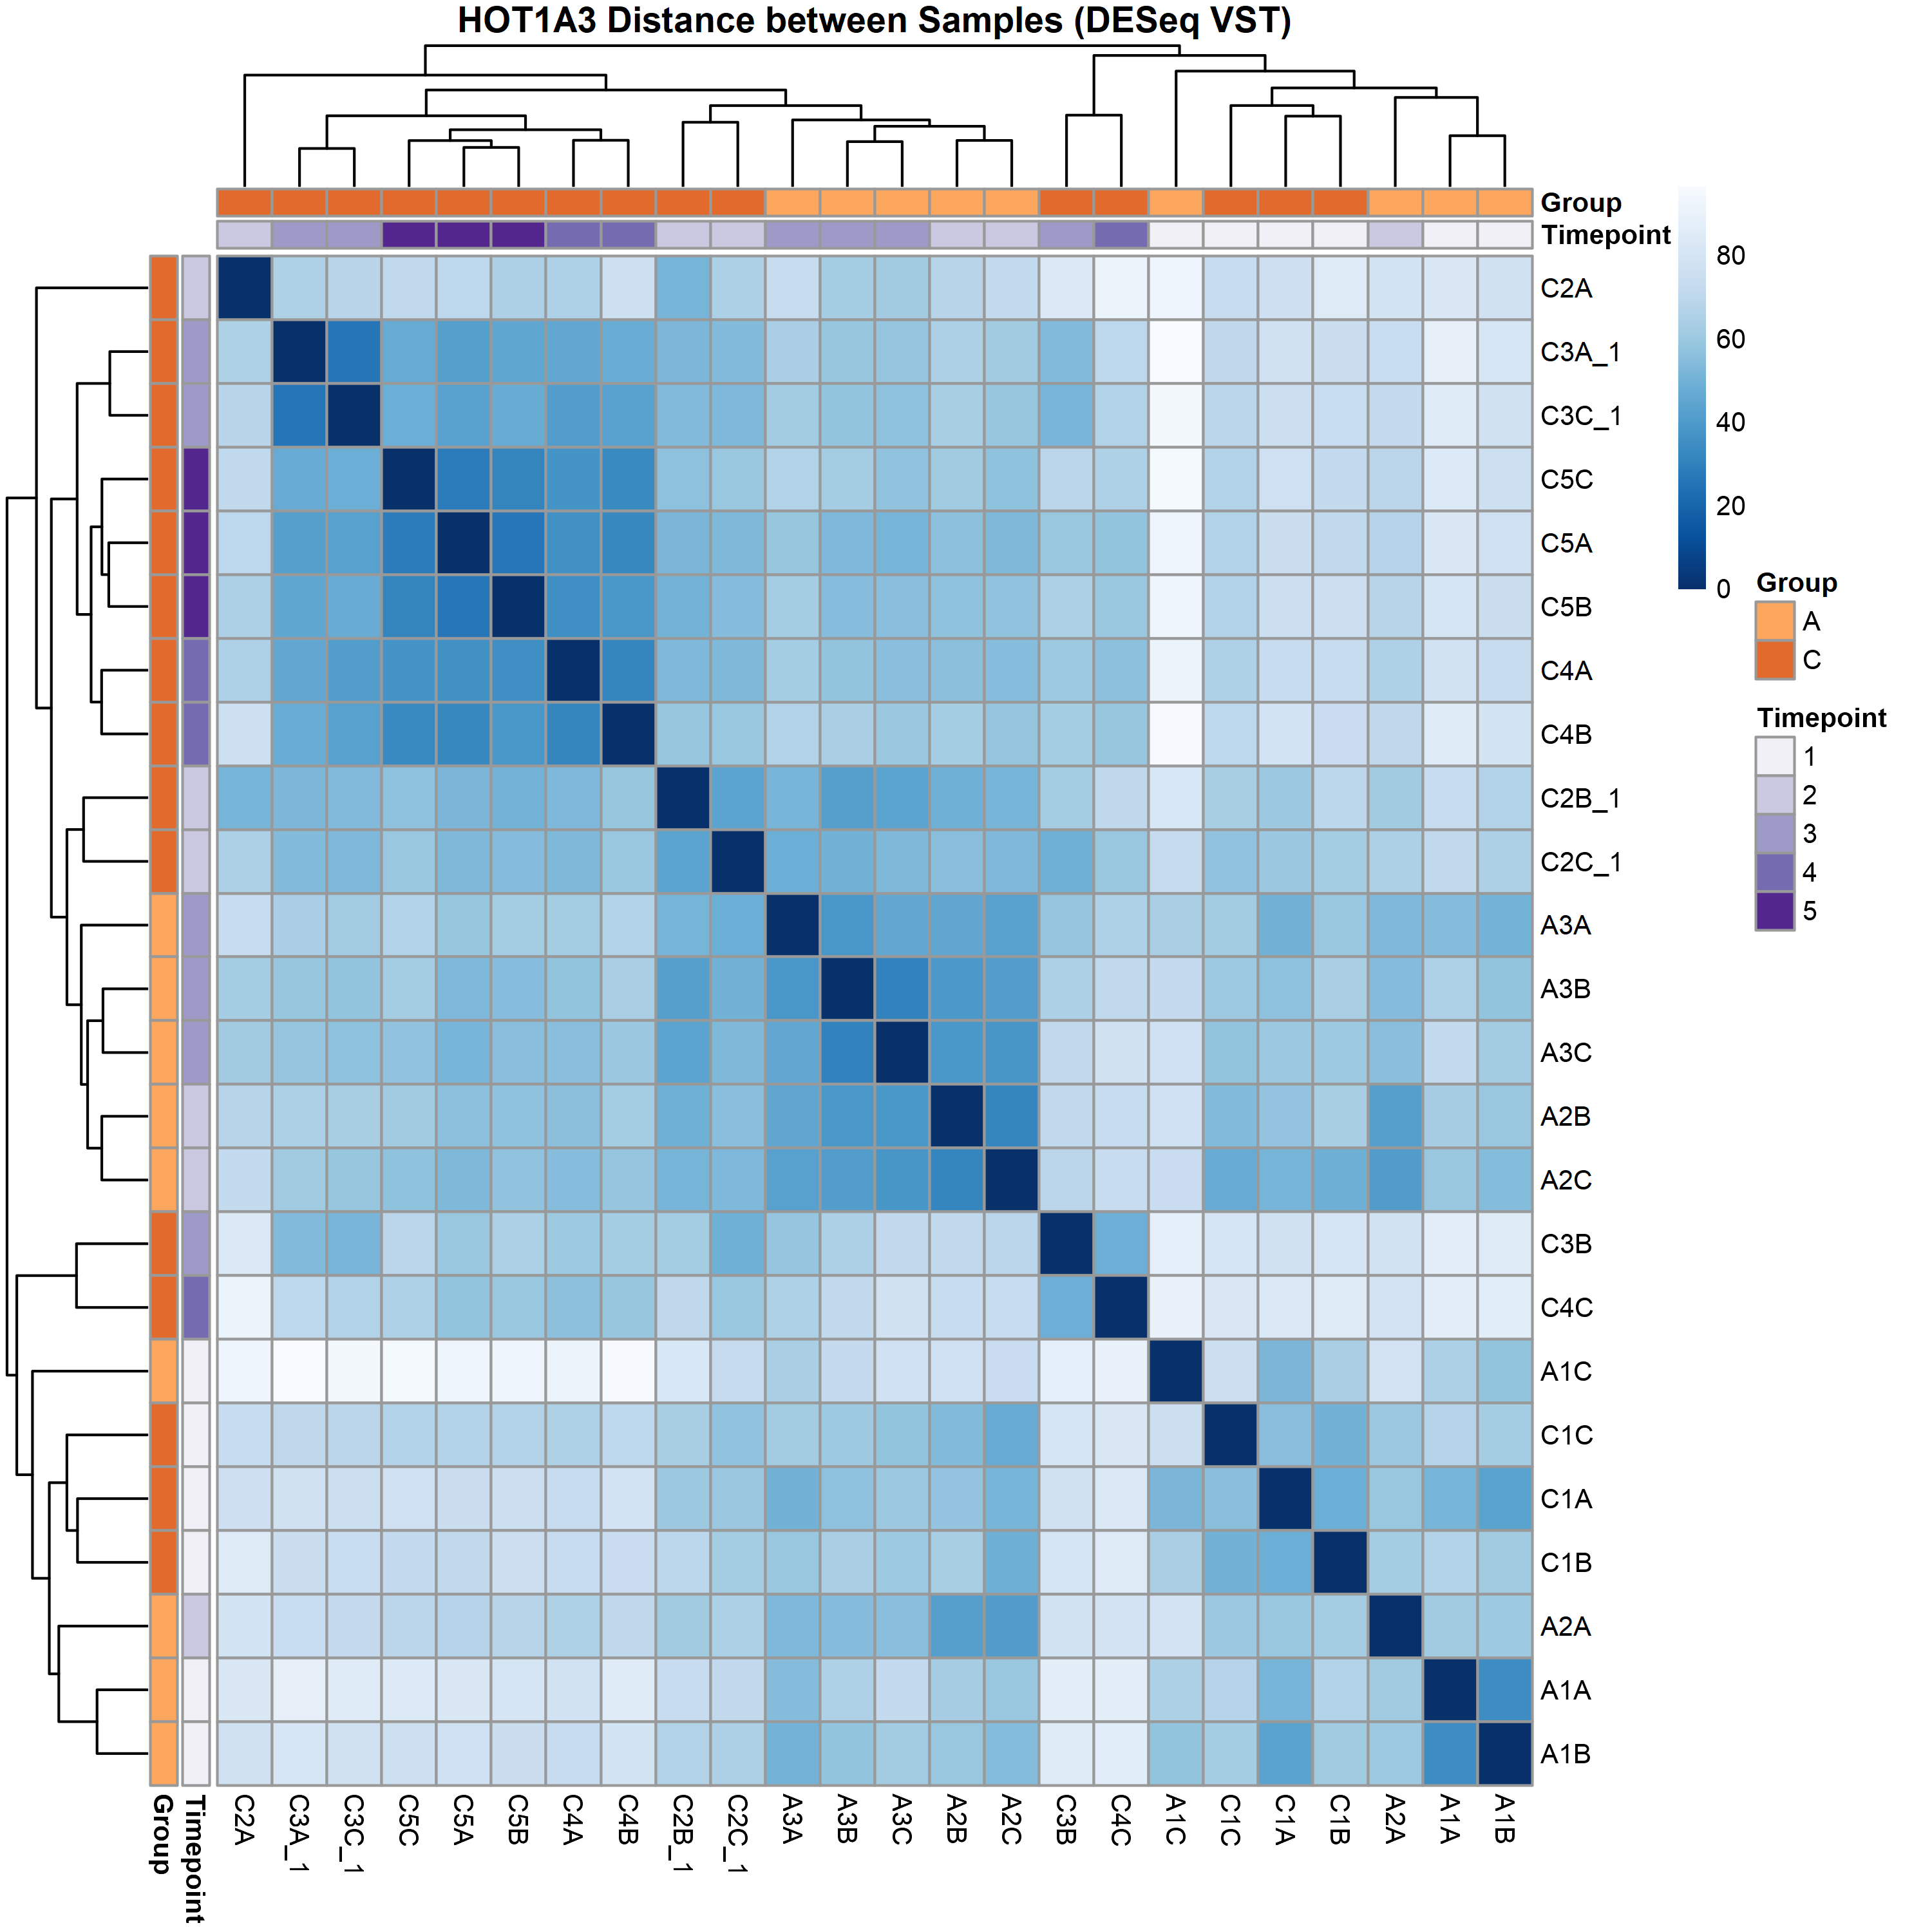

In [53]:
sampleDists <- dist(t(assay(vsd)))
#sampleDists
sampleDistMatrix <- as.matrix( sampleDists )
rownames(sampleDistMatrix) <- vsd$sample
colnames(sampleDistMatrix) <- vsd$sample
colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)
ann_df = colData(vsd)[c('Timepoint', 'Group')]

pheatmap(sampleDistMatrix,
         clustering_distance_rows = sampleDists,
         clustering_distance_cols = sampleDists,
         col = colors,
         annotation_row = ann_df,
         annotation_col = ann_df,
         annotation_colors = ann_colors,
         main = "HOT1A3 Distance between Samples (DESeq VST)"
)

In [54]:
head(sampleDistMatrix)

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
A1A,0.00000,34.69979,64.63977,60.95568,63.14526,59.08357,54.75035,65.46945,71.71263,51.01658,⋯,71.52037,88.56549,86.83670,85.07371,78.14534,85.04235,86.90675,82.55401,80.56221,83.36198
A1B,34.69979,0.00000,57.63871,60.19940,59.22063,54.41342,50.59246,57.57371,61.93206,43.81289,⋯,64.80429,81.31790,84.39325,77.89537,73.53319,79.40815,86.06893,76.49117,74.95564,76.22391
A1C,64.63977,57.63871,0.00000,79.03800,77.11668,74.49363,64.32571,72.26370,77.14914,51.97682,⋯,72.90211,96.50103,88.09256,94.55111,90.50910,95.78864,89.79265,91.94767,92.33736,95.13766
A2A,60.95568,60.19940,79.03800,0.00000,42.02162,40.83176,52.95380,54.71548,55.61576,59.30719,⋯,64.63881,74.06836,78.21035,72.26355,65.14301,70.12322,78.76130,67.44117,68.05584,69.02787
A2B,63.14526,59.22063,77.11668,42.02162,0.00000,31.43169,45.16171,39.19577,38.68609,58.25597,⋯,55.36233,64.49104,71.29309,63.44042,55.77842,62.67385,73.41686,56.22974,56.85040,61.18373
A2C,59.08357,54.41342,74.49363,40.83176,31.43169,0.00000,42.90610,41.17047,38.02673,51.23083,⋯,52.92111,61.12179,69.23182,58.76645,55.16401,58.56211,73.16868,53.30662,57.26583,57.01786


In [55]:
m = as.data.frame(sampleDistMatrix)
m$sample1 = rownames(m)
mdist = pivot_longer(m, cols=colnames(sampleDistMatrix), 
            names_to='sample2',
            values_to='dist')
mdist = mdist %>% filter(sample1 != sample2)

In [56]:
mdist = left_join(mdist, colData(dds), 
          by=c('sample1' = 'sample'), suffix=c('', '_1'), copy=TRUE)
mdist = left_join(mdist, colData(dds), 
          by=c('sample2' = 'sample'), suffix=c('', '_2'), copy=TRUE)
head(mdist)


sample1,sample2,dist,sample_id,TGCnew.,Conc.Qubit.TGC..ng.ul.,init_RNA,Lib_conc..ng.ul.,Group,Timepoint,⋯,Lib_conc..ng.ul._2,Group_2,Timepoint_2,Replicate_2,Day_2,extraction_2,techincal_replicate_2,phase_2,groupandtime_2,treatment_2
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<dbl>,<fct>,<fct>,<chr>,<chr>,<fct>,<dbl>,<fct>,<fct>,<fct>
A1A,A1B,34.69979,A1A_S7,7,168,100,0.888,A,1,⋯,0.850,A,1,B,11,1,0,logExp,A1,A1
A1A,A1C,64.63977,A1A_S7,7,168,100,0.888,A,1,⋯,1.570,A,1,C,11,1,0,logExp,A1,A1
A1A,A2A,60.95568,A1A_S7,7,168,100,0.888,A,1,⋯,0.592,A,2,A,18,2,0,decline,A2,A2
A1A,A2B,63.14526,A1A_S7,7,168,100,0.888,A,1,⋯,0.570,A,2,B,18,2,0,decline,A2,A2
A1A,A2C,59.08357,A1A_S7,7,168,100,0.888,A,1,⋯,0.980,A,2,C,18,4,0,decline,A2,A2
A1A,A3A,54.75035,A1A_S7,7,168,100,0.888,A,1,⋯,1.100,A,3,A,31,4,0,longterm,A3,A3


In [57]:
dput(colnames(mdist))

c("sample1", "sample2", "dist", "sample_id", "TGCnew.", "Conc.Qubit.TGC..ng.ul.", 
"init_RNA", "Lib_conc..ng.ul.", "Group", "Timepoint", "Replicate", 
"Day", "extraction", "techincal_replicate", "phase", "groupandtime", 
"treatment", "sample_id_2", "TGCnew._2", "Conc.Qubit.TGC..ng.ul._2", 
"init_RNA_2", "Lib_conc..ng.ul._2", "Group_2", "Timepoint_2", 
"Replicate_2", "Day_2", "extraction_2", "techincal_replicate_2", 
"phase_2", "groupandtime_2", "treatment_2")


In [58]:
cgroup_levels = c("AA",  "CA", "CC")
cgroup_levels = c("Distance from A to A",  "Distance from C to A", 
                  "Distance from C to C")
ctime_levels = c(
    "11", 
    "21", '22', 
    '31', '32', "33", 
    '41', '42', "43", "44", 
    '51', '52', "53", "54", "55"
)
cself= c('11', '22', '33','44', '55')
mdist = mdist %>% 
   mutate(combgroup = paste('Distance from', Group, 'to', Group_2),
          combtime = paste0(Timepoint, Timepoint_2),
          self = combtime %in% cself
         ) %>%
   rename(Distance_to_timepoint = Timepoint_2 ) %>%
   filter(combgroup %in% cgroup_levels, combtime %in% ctime_levels)
  
dput(unique(mdist$combgroup))
dput(unique(mdist$combtime))

c("Distance from A to A", "Distance from C to A", "Distance from C to C"
)
c("11", "21", "22", "31", "32", "33", "41", "42", "43", "44", 
"51", "52", "53", "54", "55")


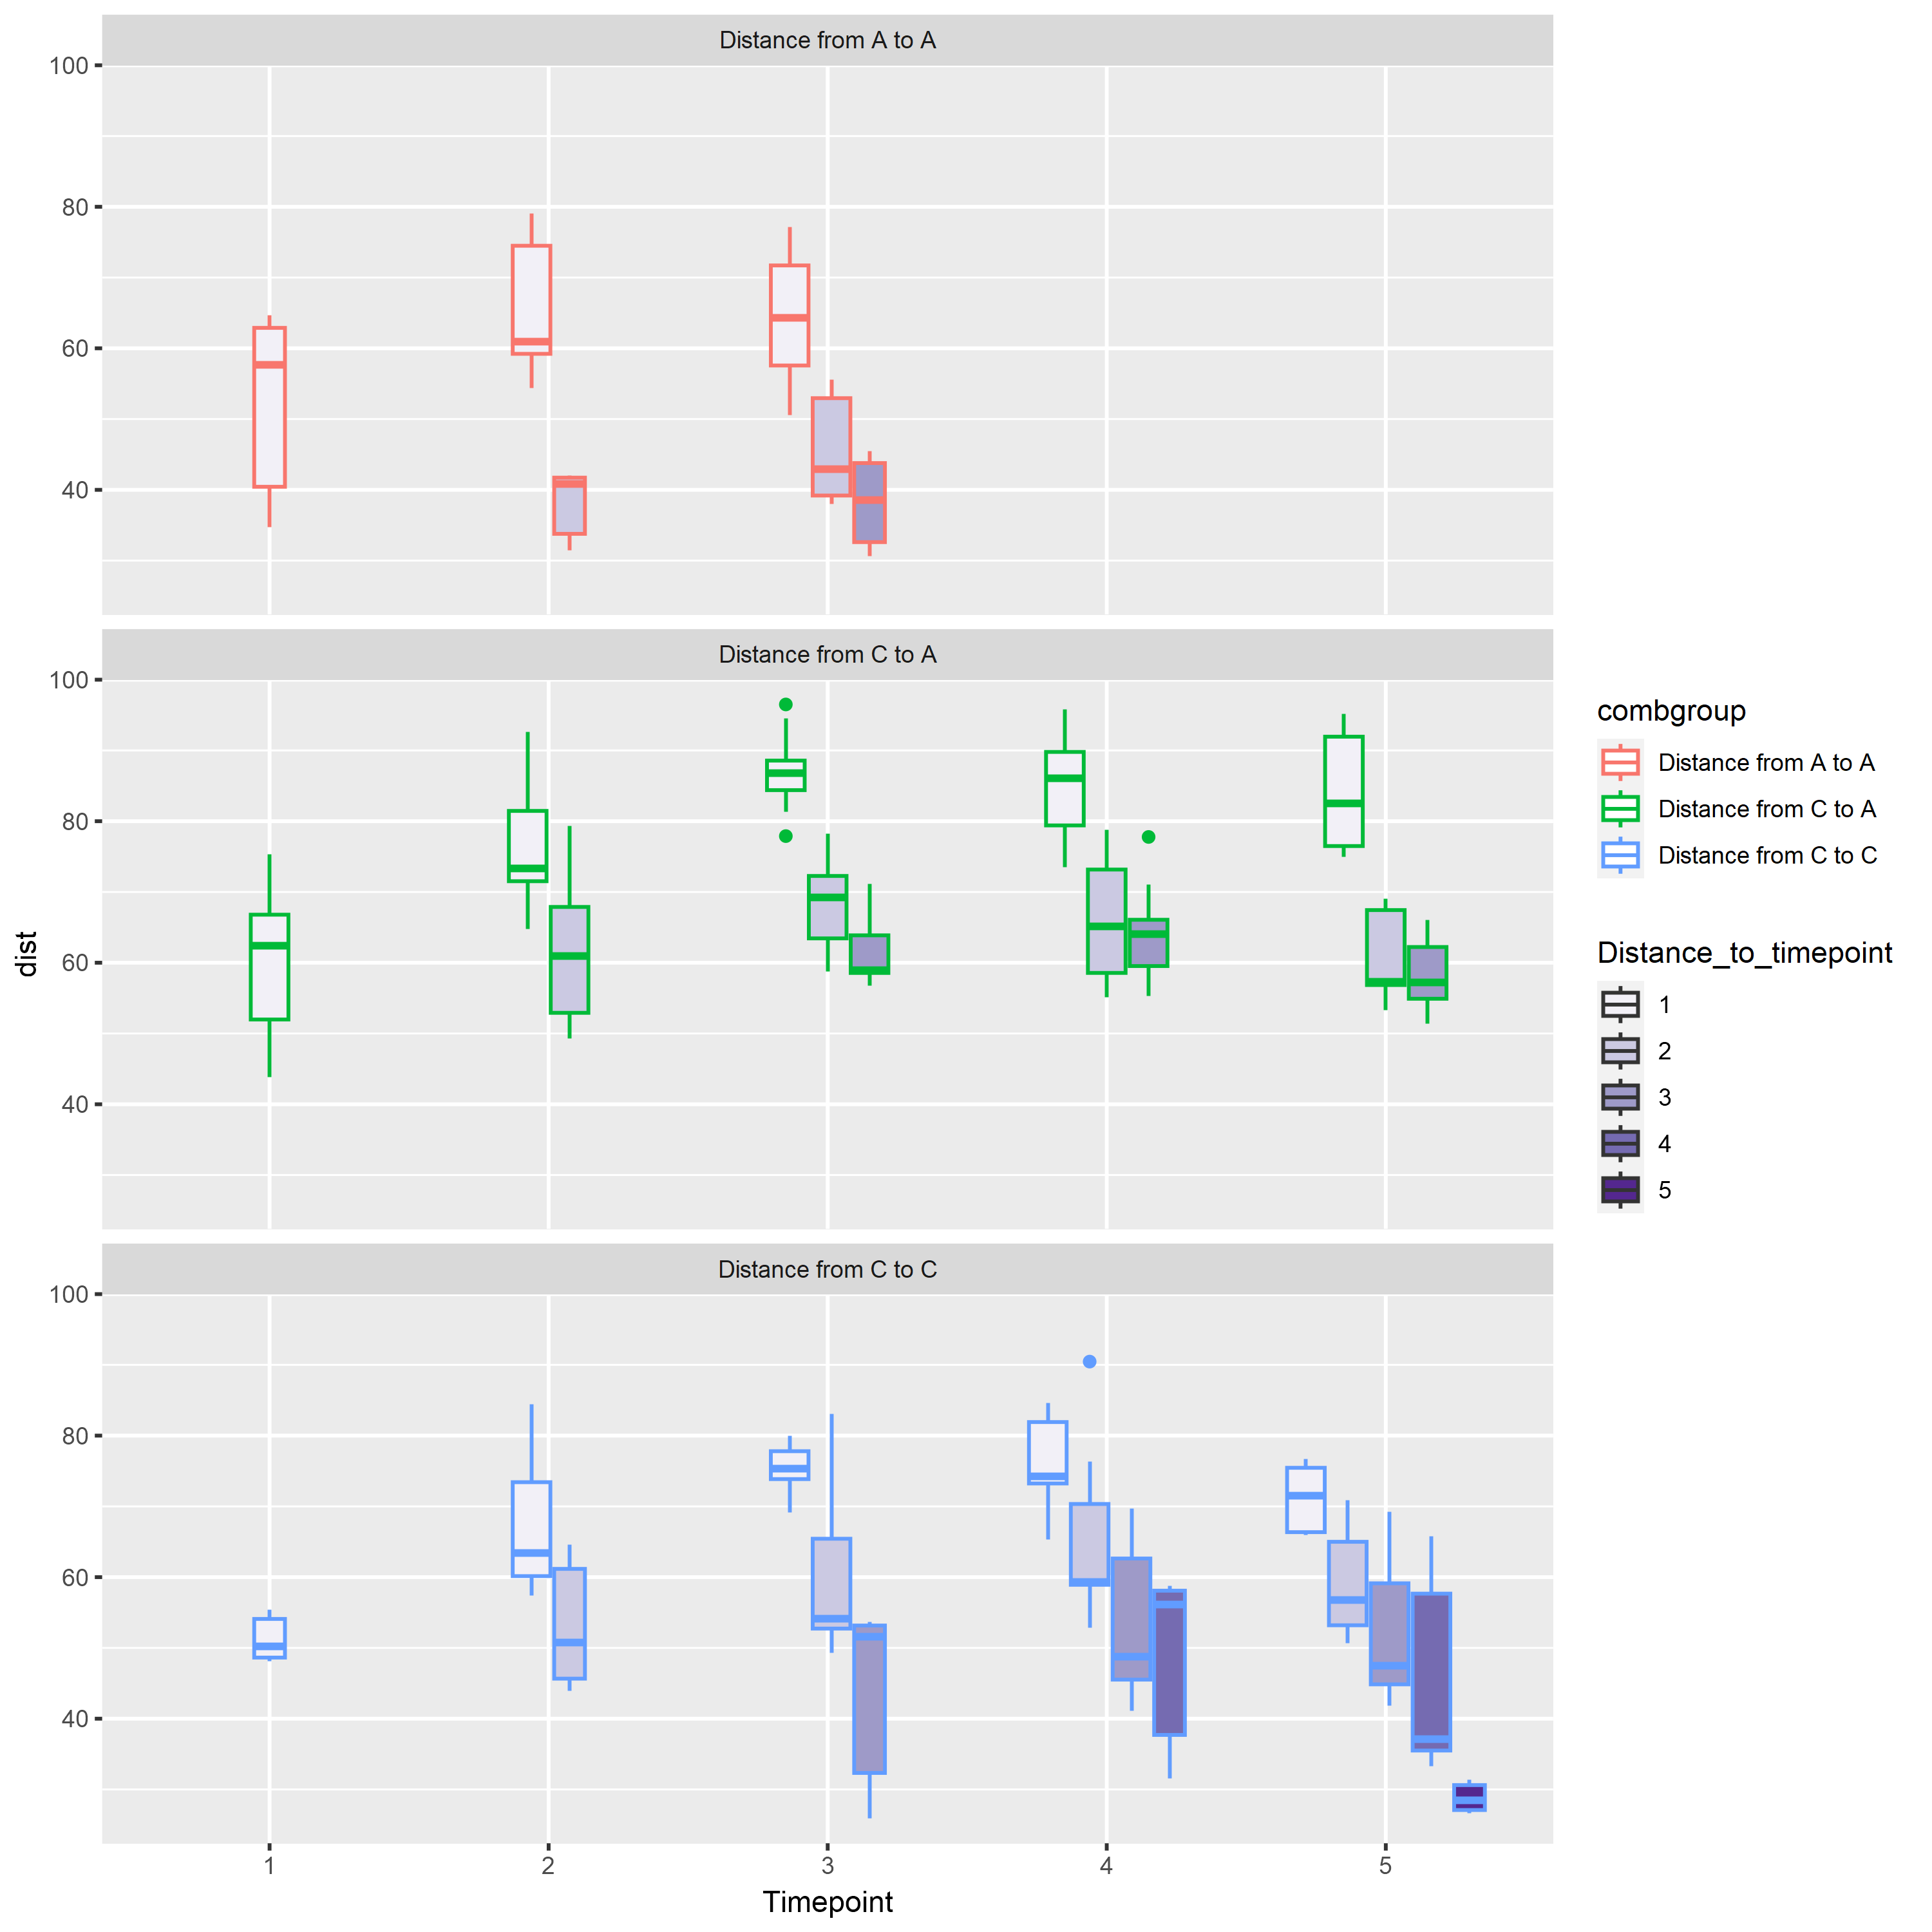

In [59]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=combgroup)) +
   #geom_point() +
   #geom_line(aes(group=Timepoint_2))
   geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1)

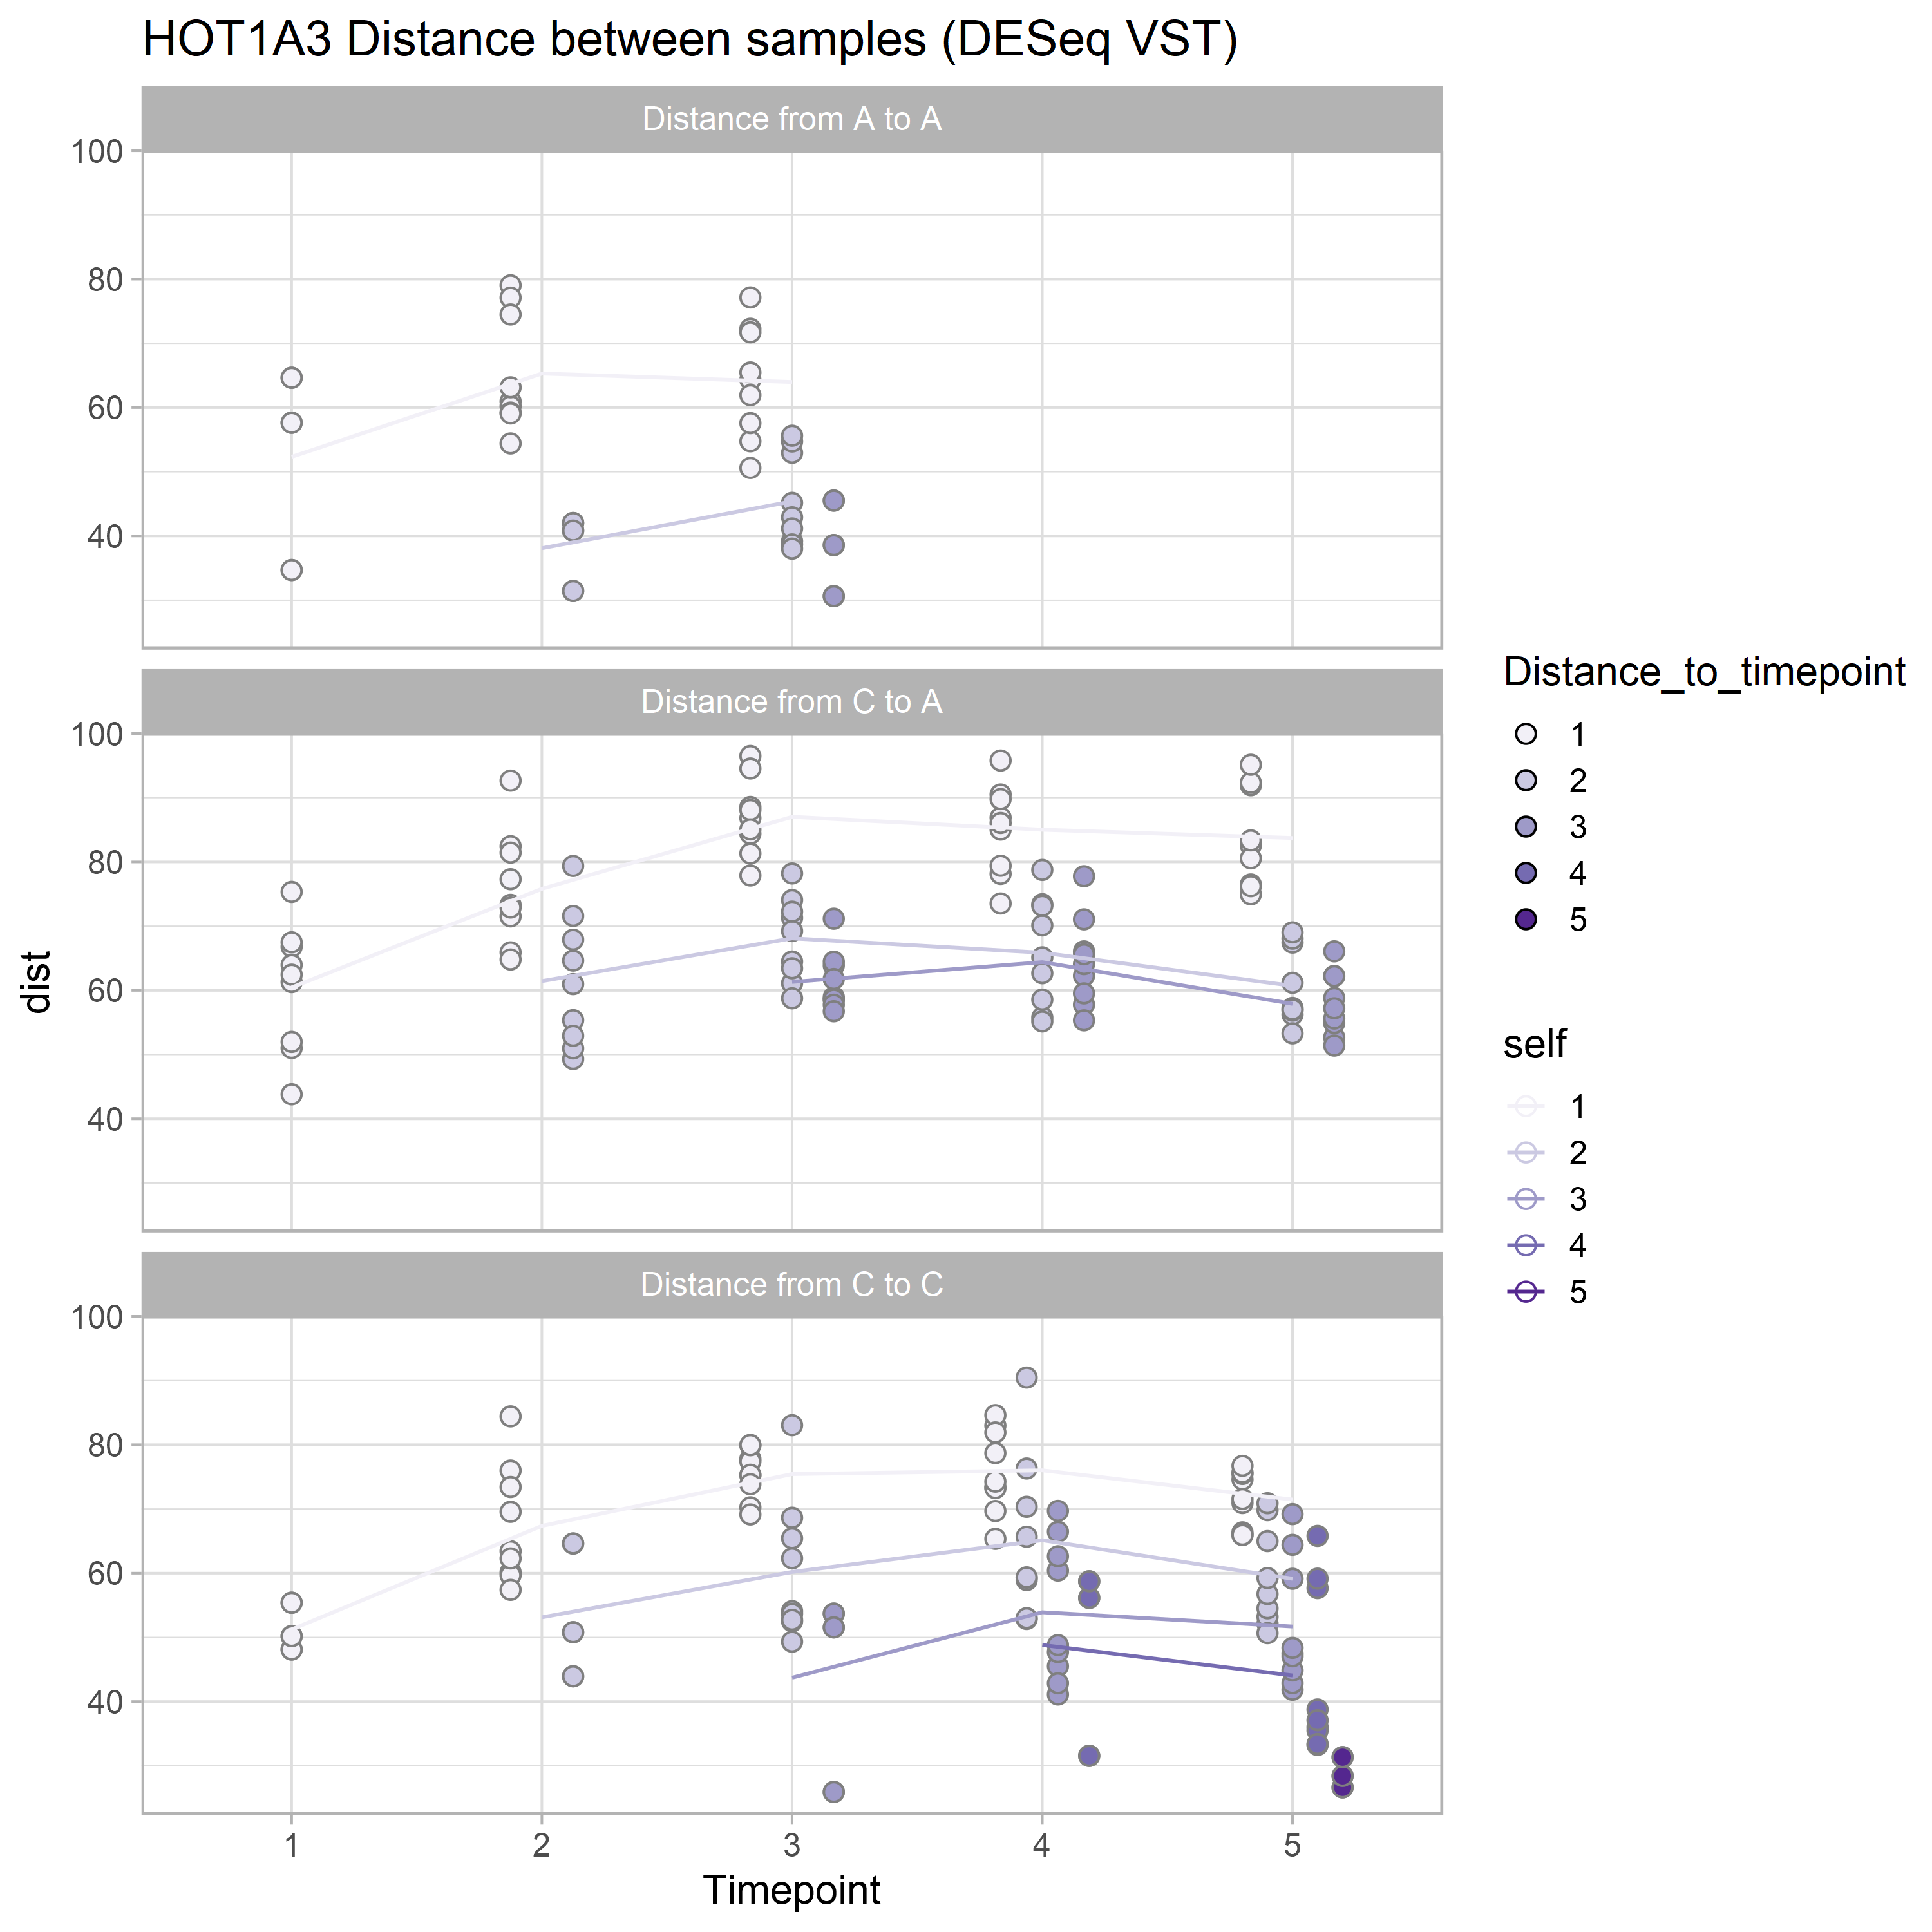

In [60]:
ggplot(mdist, aes(x=Timepoint, y=dist, fill=Distance_to_timepoint, 
                  color=self,
                  group=Distance_to_timepoint)) +
   geom_point(shape = 21, stroke = 0.5,
       position=position_dodge(width=0.5), #color='grey',
             size=3) +
   stat_summary(aes(color=Distance_to_timepoint), fun=mean, geom="line") +
   #geom_line(aes(group=Timepoint_2))
   #geom_boxplot(varwidth = TRUE) +
   scale_fill_manual(values = ann_colors$Timepoint) +
   scale_color_manual(values = ann_colors$Timepoint) +
   facet_wrap(~combgroup, ncol=1) +
  ggtitle("HOT1A3 Distance between samples (DESeq VST)") +
  theme_light(base_size = 15)


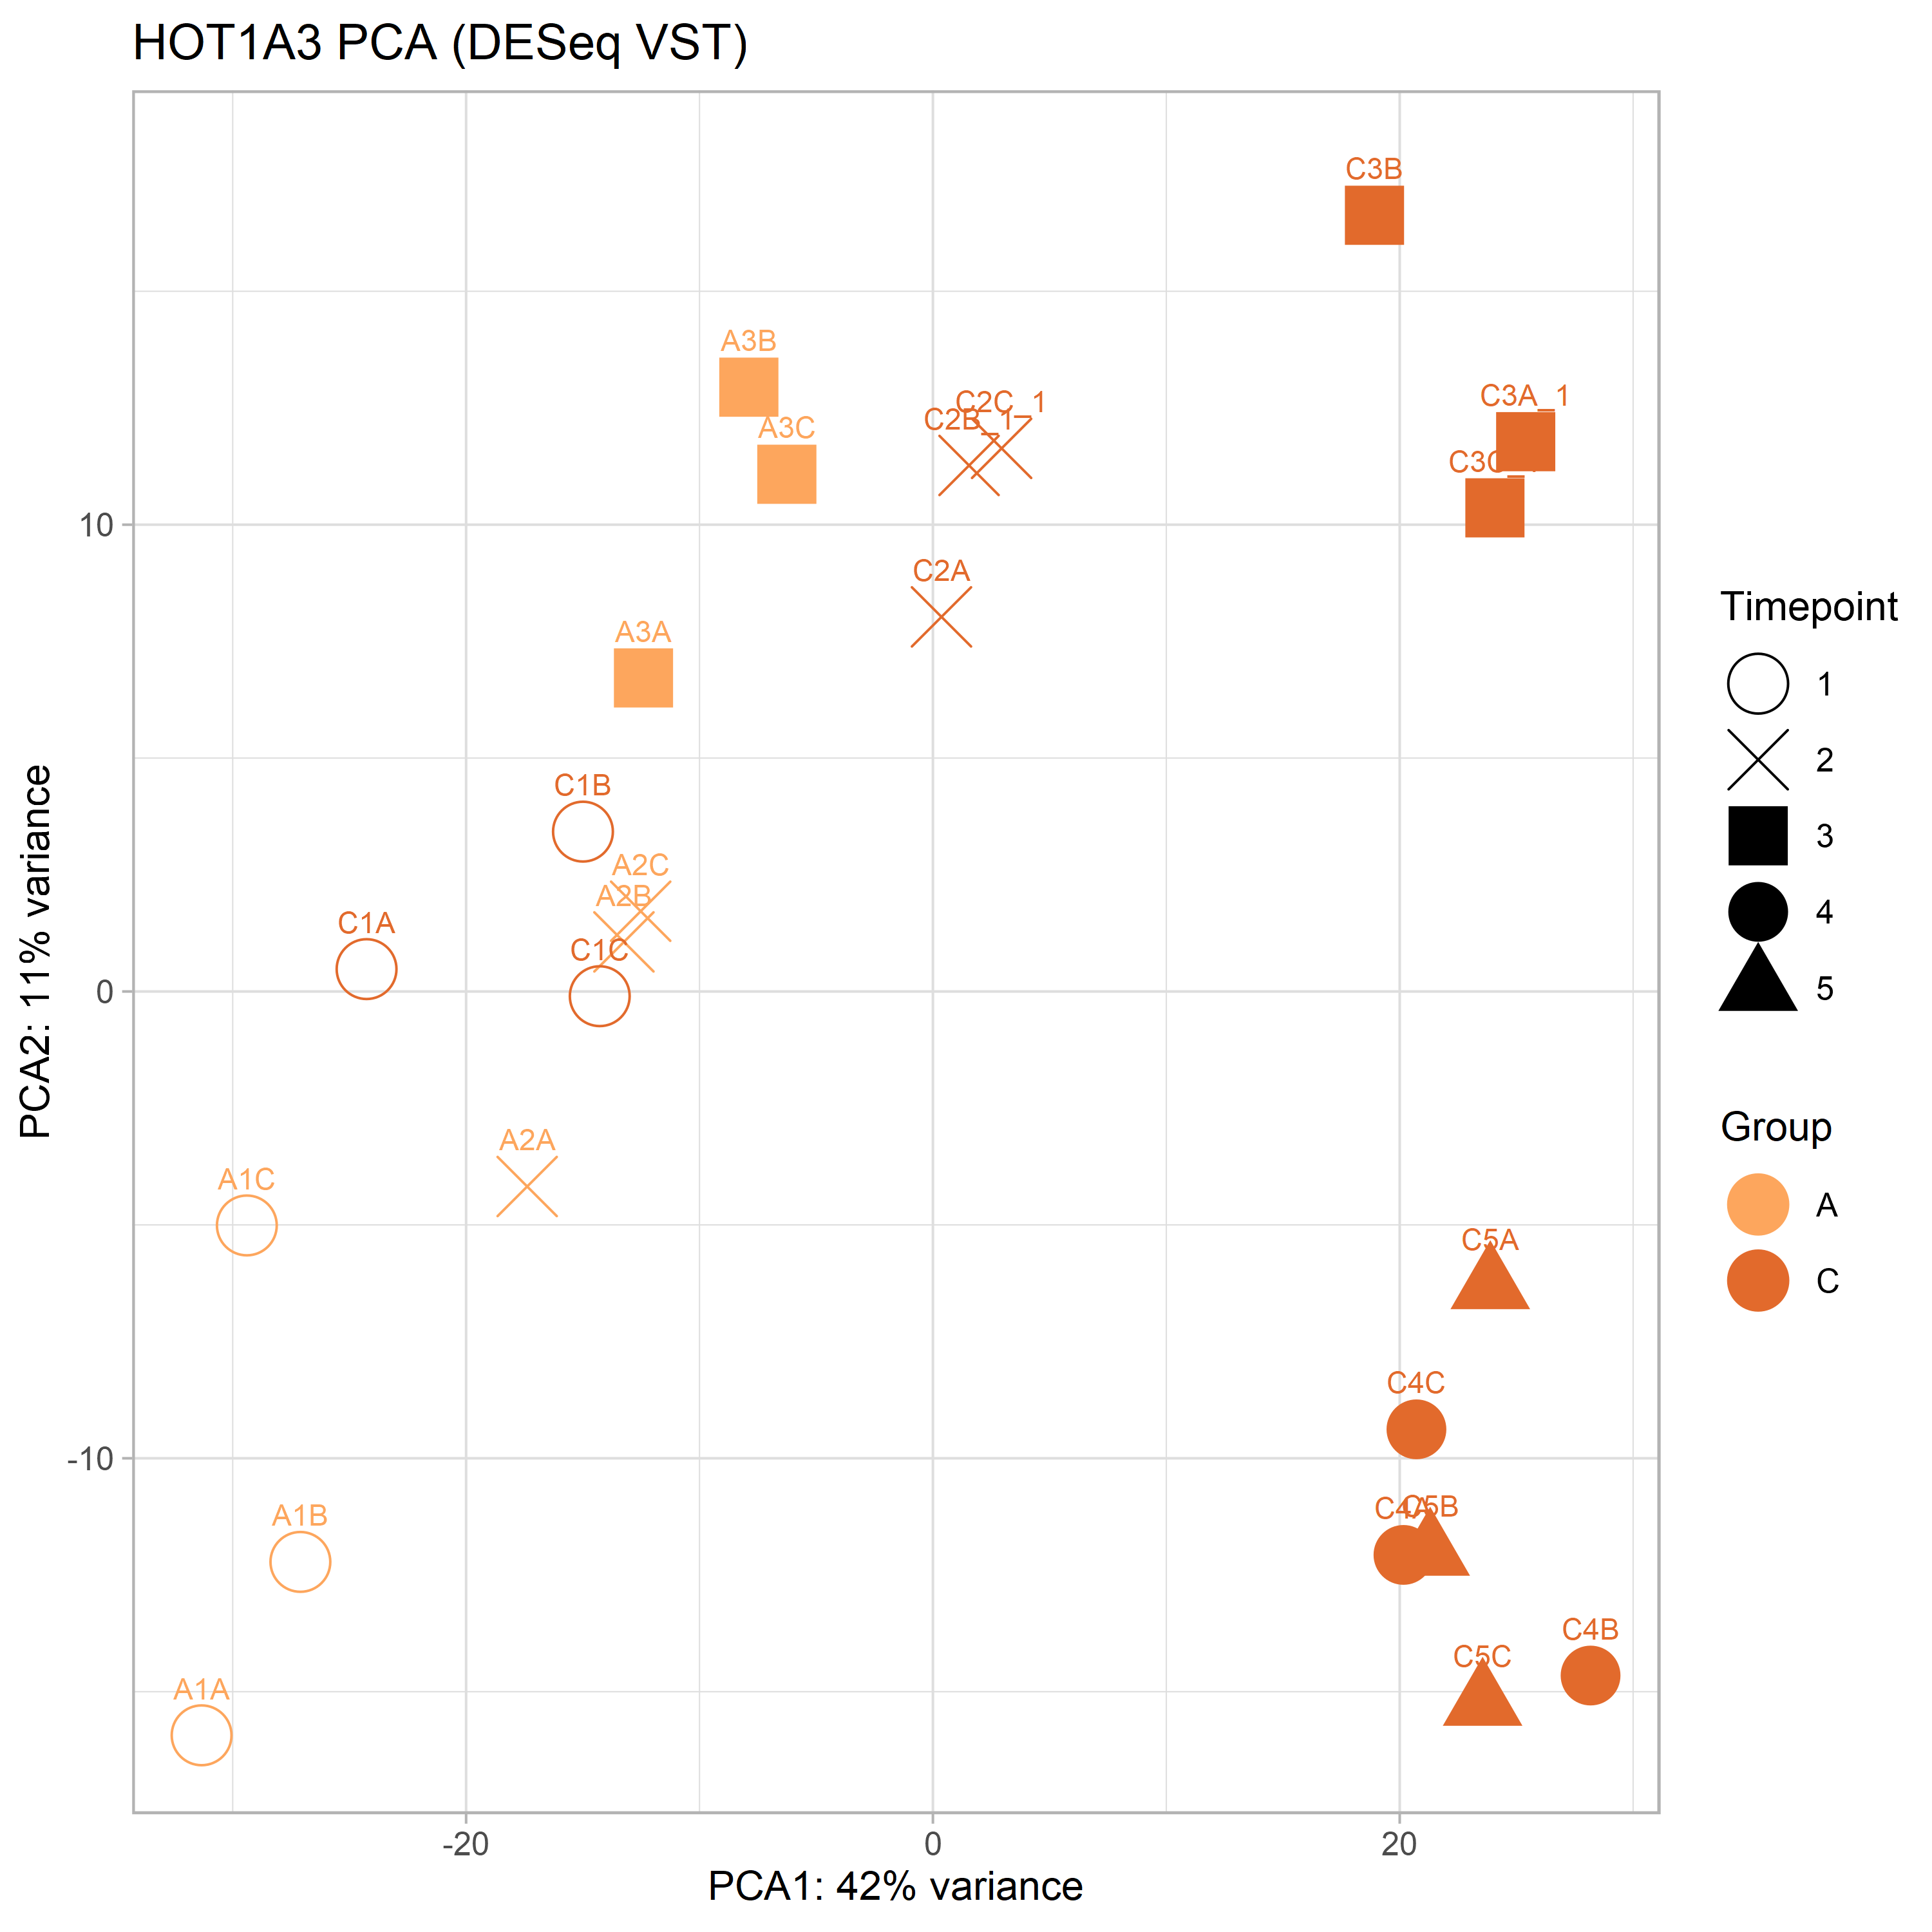

In [61]:
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1, y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =10) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(1, 4, 15, 16, 17))+
  ggtitle("HOT1A3 PCA (DESeq VST)") +
  theme_light(base_size = 15)



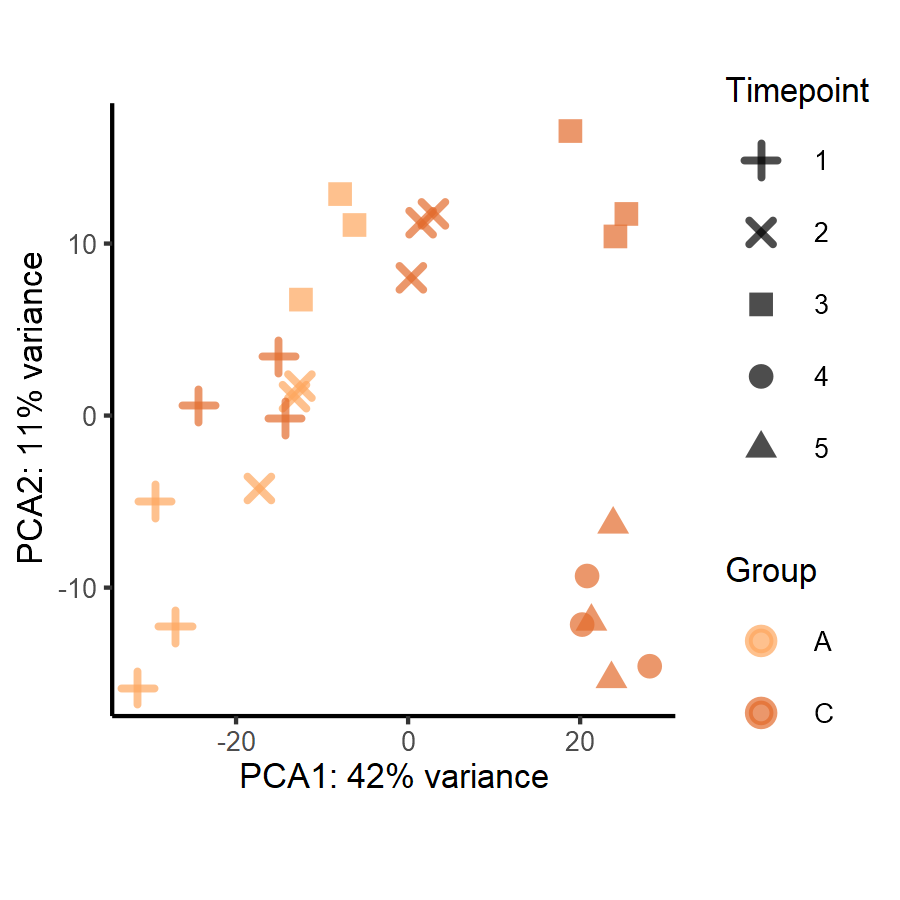

In [62]:
options(repr.plot.width = 3, repr.plot.height = 3, repr.plot.res = 300)
pcaData <- plotPCA(vsd, intgroup = c( "Timepoint", "Group", 'sample', 'treatment'), 
                   returnData = TRUE)
percentVar <- round(100 * attr(pcaData, "percentVar"))
gpal = brewer.pal(4, 'Dark2')

ggplot(pcaData, aes(x = PC1,  y = PC2, 
                    color = Group, shape = Timepoint, label=sample)) +
  geom_point(size =2, stroke = 1, alpha=0.7, position=position_jitter(h=0.1,w=0.1)) +
  xlab(paste0("PCA1: ", percentVar[1], "% variance")) +
  ylab(paste0("PCA2: ", percentVar[2], "% variance")) +
  coord_fixed(ratio=2) +
  #geom_text(nudge_y = 1) +
  scale_color_manual(values = ann_colors$Group) +
  scale_shape_manual(values=c(3,4, 15,16,17))+
  #ggtitle("1A3 PCA (DESeq VST)") +
  theme_classic(base_size = 8)  



In [63]:
assay(vsd)# [,c('C1', 'C2', 'C3', 'C4', 'C5')] #%>% select(starts_with('C')) # %>% rowSds() %>% hist()
#hist(rowSds(assay(vsd)))

,A1A,A1B,A1C,A2A,A2B,A2C,A3A,A3B,A3C,C1A,⋯,C2C_1,C3A_1,C3B,C3C_1,C4A,C4B,C4C,C5A,C5B,C5C
ACZ81_RS00005,12.035612,12.102609,11.472172,12.776809,12.754058,12.735234,12.151772,12.274321,12.512161,12.112799,⋯,11.043654,12.150845,11.445263,11.547829,11.973853,11.813894,11.612752,12.075281,12.356492,12.387504
ACZ81_RS00010,11.306879,11.007923,10.703742,11.205526,11.373814,11.448942,10.747299,10.875888,11.163000,10.923304,⋯,10.929588,10.895005,10.712297,10.821419,10.815223,10.691053,9.942498,10.882584,10.968582,10.801346
ACZ81_RS00015,9.178083,9.095882,8.787357,9.782489,9.228102,9.357566,9.041679,9.023145,8.591974,9.411783,⋯,9.257584,9.275076,9.674365,8.876029,8.955102,8.687524,9.534044,9.041460,9.125580,8.694559
ACZ81_RS00020,11.876121,11.371842,10.993771,11.708988,11.815098,12.073459,11.118865,11.043527,11.090171,11.936396,⋯,11.382274,11.853235,10.862798,11.525300,11.260534,11.189814,10.159685,11.316891,11.641919,11.762318
ACZ81_RS00025,7.058408,6.457927,7.192022,7.884497,7.571898,7.622041,7.736868,7.432799,7.851871,7.187065,⋯,7.568958,7.160886,7.673187,7.670145,7.115428,7.451918,7.627033,7.071315,7.390266,6.879899
ACZ81_RS00030,11.122963,11.226409,10.103566,11.144567,11.354450,11.569514,10.689507,11.108051,11.501901,11.334468,⋯,11.014853,12.059097,10.570441,11.589645,11.523157,11.589521,10.140582,11.766180,11.780617,12.077221
ACZ81_RS00035,9.837324,10.162176,10.026855,10.386616,10.541096,10.372099,10.121554,10.819118,10.634893,10.045309,⋯,10.485555,11.452588,10.606330,10.897858,11.026910,10.933473,10.752375,11.012757,11.297044,11.055777
ACZ81_RS00040,8.290830,7.902699,7.836847,8.410133,8.054635,8.196844,8.070919,7.828624,8.213408,8.139201,⋯,8.299870,7.833208,8.252744,8.061579,7.801937,8.401683,8.102525,8.061145,8.035261,7.873513
ACZ81_RS00045,9.848351,9.566569,10.996753,9.629608,9.574173,9.604162,9.996810,9.545055,9.367527,10.364034,⋯,9.799804,9.515747,10.233664,9.223211,9.277390,9.396784,9.877639,9.474371,9.448063,9.649599
ACZ81_RS00050,9.876635,9.730195,9.905141,10.396454,10.313936,9.963836,10.041942,9.991904,10.316297,10.042830,⋯,9.195753,9.755586,9.050389,10.123574,10.410645,10.352592,9.077114,9.647451,9.821288,9.707131


In [64]:
alpha=0.01

In [65]:
dds <- DESeq(dds)
res <- results(dds, alpha=alpha)
res

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



log2 fold change (MLE): treatment longterm vs A1 
Wald test p-value: treatment longterm vs A1 
DataFrame with 4015 rows and 6 columns
               baseMean log2FoldChange     lfcSE        stat    pvalue
              <numeric>      <numeric> <numeric>   <numeric> <numeric>
ACZ81_RS00005  4661.896     0.16664491  0.285493  0.58370922 0.5594160
ACZ81_RS00010  2059.391    -0.31030110  0.230529 -1.34604149 0.1782891
ACZ81_RS00015   557.127     0.00176097  0.281619  0.00625302 0.9950108
ACZ81_RS00020  3109.652    -0.15805448  0.312929 -0.50508084 0.6135021
ACZ81_RS00025   160.545     0.39423077  0.229047  1.72118189 0.0852178
...                 ...            ...       ...         ...       ...
ACZ81_RS21670  293.8270      0.0627626  0.263357    0.238318  0.811635
ACZ81_RS21675 5019.9987      0.6620481  0.595693    1.111391  0.266400
ACZ81_RS21680 2705.7262      0.4754786  0.578918    0.821323  0.411462
ACZ81_RS21685   79.6218      0.1966994  0.245588    0.800933  0.423170
ACZ81_RS21705 

In [66]:
s = summary(res)
s


out of 4015 with nonzero total read count
adjusted p-value < 0.01
LFC > 0 (up)       : 608, 15%
LFC < 0 (down)     : 839, 21%
outliers [1]       : 5, 0.12%
low counts [2]     : 0, 0%
(mean count < 0)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



NULL

In [67]:
sum_dds <- function(name) {
    res = results(dds, contrast=name)
    sum = table(as.data.frame(res) %>% mutate(
           contrast = paste0(name[2],'vs', name[3]),
        na_pvalue = is.na(pvalue),
               na_padj = is.na(padj),
               significant = padj < 0.05,
               direction = if_else(log2FoldChange > 0, 'up', 'down'),
               status = if_else(na_pvalue, 'outlier',
                                if_else(na_padj, 'lowcount', 
                                        if_else(significant, direction, 'no_significant'
                                        
                               )))
               ) %>% select(status))
    #sum = cbind(sum, name=name)
    return(sum)
    }


In [68]:
get_dds <- function(name) {
    res = results(dds, contrast=name)
    res = as.data.frame(res) %>% 
       mutate(
           contrast = paste0(name[2],'vs', name[3]),
           na_pvalue = is.na(pvalue),
           na_padj = is.na(padj),
           significant = padj < 0.05,
           direction = if_else(log2FoldChange > 0, 'up', 'down'),
           status = if_else(na_pvalue, 'outlier',
                            if_else(na_padj, 'lowcount', 
                                    if_else(significant, direction, 'no_significant'
                                           )))
       ) 
    return(res)
}


In [69]:
results_names = resultsNames(dds)

dds$treatment = factor(dds$treatment, levels=c('A1', 'A2','A3','C1', 'C2', 'C3', 'longterm', 'NA'))

contrasts_to_check = list (
    c('treatment','longterm','A1'), 
    c('treatment','longterm','A2'), 
    c('treatment','longterm','A3'), 
    c('treatment','longterm','C1'), 
    c('treatment','longterm','C2'),
    c('treatment','longterm','C3')
)

contrasts_to_check

[[1]]
[1] "treatment" "longterm"  "A1"       

[[2]]
[1] "treatment" "longterm"  "A2"       

[[3]]
[1] "treatment" "longterm"  "A3"       

[[4]]
[1] "treatment" "longterm"  "C1"       

[[5]]
[1] "treatment" "longterm"  "C2"       

[[6]]
[1] "treatment" "longterm"  "C3"

In [70]:
#bind_rows(
sum_df = lapply(contrasts_to_check, sum_dds) %>% bind_rows 
sum_df$name= contrasts_to_check
sum_df


down,no_significant,outlier,up,lowcount,name
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<list>
1023,2119,5,868,NA,treatmen....
363,3328,5,319,NA,treatmen....
343,3294,5,296,77,treatmen....
758,2647,5,605,NA,treatmen....
399,3291,5,243,77,treatmen....
111,3810,5,89,NA,treatmen....


In [71]:
#bind_rows(
res_df = lapply(contrasts_to_check, get_dds) %>% 
  bind_rows %>%
  rownames_to_column(var = 'gene_id') 

write_csv(res_df, file.path('DE_results','HOT1A3_DE_DESEQ_longterm_results.csv'))


In [72]:
sum_df = sum_df %>% 
   filter(name != 'Intercept') %>% 
   mutate(tot_fc = up + down, 
         name = str_remove(name, 'treatment_'))

Warning message:
"There was 1 warning in `mutate()`.
ℹ In argument: `name = str_remove(name, "treatment_")`.
Caused by warning in `stri_replace_first_regex()`:
! argument is not an atomic vector; coercing"


In [73]:
sum_df

down,no_significant,outlier,up,lowcount,name,tot_fc
<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<table[1d]>,<chr>,<table[1d]>
1023,2119,5,868,NA,"c(""treatment"", ""longterm"", ""A1"")",1891
363,3328,5,319,NA,"c(""treatment"", ""longterm"", ""A2"")",682
343,3294,5,296,77,"c(""treatment"", ""longterm"", ""A3"")",639
758,2647,5,605,NA,"c(""treatment"", ""longterm"", ""C1"")",1363
399,3291,5,243,77,"c(""treatment"", ""longterm"", ""C2"")",642
111,3810,5,89,NA,"c(""treatment"", ""longterm"", ""C3"")",200


In [74]:
dds@design

~treatment

In [75]:
res_df

gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,contrast,na_pvalue,na_padj,significant,direction,status
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<lgl>,<lgl>,<lgl>,<chr>,<chr>
ACZ81_RS00005...1,4661.89608,0.166644914,0.2854930,0.583709221,5.594160e-01,6.549658e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
ACZ81_RS00010...2,2059.39141,-0.310301101,0.2305286,-1.346041492,1.782891e-01,2.635236e-01,longtermvsA1,FALSE,FALSE,FALSE,down,no_significant
ACZ81_RS00015...3,557.12710,0.001760972,0.2816193,0.006253024,9.950108e-01,9.960044e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
ACZ81_RS00020...4,3109.65193,-0.158054484,0.3129291,-0.505080844,6.135021e-01,6.985075e-01,longtermvsA1,FALSE,FALSE,FALSE,down,no_significant
ACZ81_RS00025...5,160.54521,0.394230773,0.2290466,1.721181886,8.521782e-02,1.440655e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
ACZ81_RS00030...6,2892.23928,0.693162384,0.3951887,1.754003360,7.942993e-02,1.360009e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
ACZ81_RS00035...7,1662.40704,1.017387048,0.2339972,4.347860121,1.374722e-05,7.723691e-05,longtermvsA1,FALSE,FALSE,TRUE,up,up
ACZ81_RS00040...8,258.53012,0.027648876,0.2140836,0.129149930,8.972390e-01,9.265847e-01,longtermvsA1,FALSE,FALSE,FALSE,up,no_significant
ACZ81_RS00045...9,892.24746,-0.750228525,0.2802819,-2.676692313,7.435288e-03,1.864634e-02,longtermvsA1,FALSE,FALSE,TRUE,down,down
